
## <font color='blue'>Análise Multivariada em Ciência de Dados</font>
## <font color='blue'>Lab 7</font>
## <font color='blue'>Prática com Dataset de Alta Dimensionalidade</font>

## Instalando e Carregando os Pacotes

In [3]:
# Imports
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings('ignore')

## Carregando e Compreendendo os Dados

Primeiro, criaremos um conjunto de dados fictício com 8 características e 1000 observações usando o numpy.

In [5]:
# Para reprodutibilidade
np.random.seed(42)  

In [6]:
# Gera os dados
data = np.random.randn(1000, 8)
df = pd.DataFrame(data, columns=[f'Atributo_{i}' for i in range(1, 9)])

In [7]:
df.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435
1,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288
2,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
3,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278
4,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861


## Preparação dos Dados

Nesta etapa, vamos padronizar os dados:

In [8]:
# Cria o padronizador
scaler = StandardScaler()

In [9]:
# Aplica o padronizador
scaled_data = scaler.fit_transform(df)

## Aplicando PCA às Variáveis de Entrada

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
df.shape

(1000, 8)

In [11]:
# Cria o modelo
pca = PCA()

In [12]:
# Treina e aplica o modelo aos dados padronizados
pca_data = pca.fit_transform(scaled_data)

## Calculando a Matriz de Covariância

No contexto do PCA, a matriz de covariância desempenha um papel vital. Para entender sua importância, vamos primeiro abordar o que ela é e como se relaciona com o PCA.

A matriz de covariância é uma matriz quadrada que mede a covariância entre cada par de variáveis em um conjunto de dados. Covariância, em termos simples, é uma medida de como duas variáveis variam juntas. Se ambas as variáveis tendem a aumentar ou diminuir juntas, a covariância é positiva; se uma variável tende a aumentar quando a outra diminui, a covariância é negativa; e se as variáveis não exibem qualquer tendência consistente de variação conjunta, a covariância é próxima de zero.

A principal motivação por trás do PCA é reduzir a dimensionalidade de um conjunto de dados mantendo o máximo de informação possível. O PCA busca identificar "direções" no espaço de dados que capturam a maior variância nos dados. Essas direções são os chamados componentes principais.

A relação entre a matriz de covariância e o PCA é que os componentes principais são determinados a partir dos autovetores da matriz de covariância. O primeiro componente principal é a direção (ou autovetor) que corresponde ao maior autovalor da matriz de covariância e, portanto, captura a maior variância nos dados. O segundo componente principal é a direção que captura a segunda maior variância, e assim por diante.

In [13]:
# Calcula a matriz de Covariância 
cov_matrix = np.cov(scaled_data, rowvar = False)
print(cov_matrix)

[[ 1.00100100e+00 -3.69357111e-02  3.06924109e-03 -3.40509104e-02
  -2.46119766e-02  1.71832531e-02  1.04925691e-02 -2.19223880e-02]
 [-3.69357111e-02  1.00100100e+00 -4.84707341e-02 -3.25134657e-02
  -6.87427050e-03 -5.40529525e-02  1.51251647e-02 -2.03757820e-02]
 [ 3.06924109e-03 -4.84707341e-02  1.00100100e+00 -2.26662376e-03
  -3.83098518e-02  2.49333208e-02 -3.98294504e-02 -8.44378492e-03]
 [-3.40509104e-02 -3.25134657e-02 -2.26662376e-03  1.00100100e+00
  -7.38873848e-02  2.97271555e-02 -8.86529733e-03  8.37242871e-04]
 [-2.46119766e-02 -6.87427050e-03 -3.83098518e-02 -7.38873848e-02
   1.00100100e+00 -1.17331628e-02 -2.74971107e-02  2.51417888e-02]
 [ 1.71832531e-02 -5.40529525e-02  2.49333208e-02  2.97271555e-02
  -1.17331628e-02  1.00100100e+00  3.13041748e-02 -1.05193266e-02]
 [ 1.04925691e-02  1.51251647e-02 -3.98294504e-02 -8.86529733e-03
  -2.74971107e-02  3.13041748e-02  1.00100100e+00  2.38964840e-02]
 [-2.19223880e-02 -2.03757820e-02 -8.44378492e-03  8.37242871e-04
   

## Visualizando a Variância Explicada

In [14]:
# Extrai a variância explicada
explained_variance = pca.explained_variance_ratio_

In [15]:
# Ajustar o range para começar de 1
components = range(1, len(explained_variance) + 1)

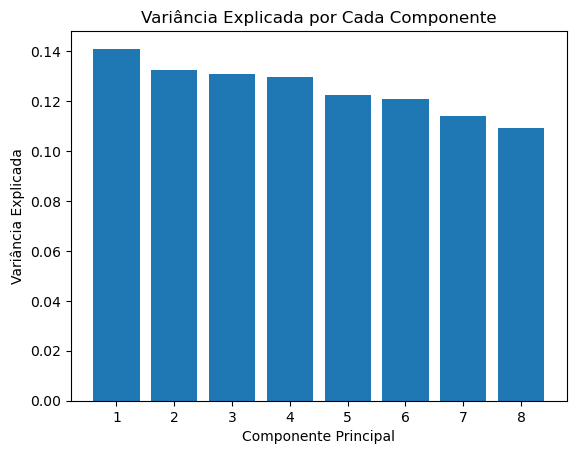

In [16]:
# Plot
plt.bar(components, explained_variance)

# Ajustar os ticks no eixo x
plt.xticks(components)

plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Cada Componente')
plt.show()

## Identificação e Interpretação de Cada Componente

In [17]:
# Extraindo os componentes principais
components = pd.DataFrame(pca.components_, columns = df.columns, index = [f'PC-{i}' for i in range(1, 9)])

In [18]:
components

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8
PC-1,-0.196388,0.468139,-0.405046,-0.417747,0.436951,-0.448249,0.010965,0.108297
PC-2,-0.275254,0.406774,-0.350551,0.470875,-0.485621,-0.042320,0.420036,-0.010603
PC-3,0.389133,-0.176295,-0.305869,-0.250275,0.137979,0.371768,0.654928,0.274085
PC-4,0.542503,0.297805,0.009931,-0.296110,-0.291527,-0.101594,0.043470,-0.657285
PC-5,-0.263291,-0.017466,-0.357604,0.145364,0.401602,0.537062,-0.112864,-0.564716
PC-6,0.446916,-0.310198,-0.585621,0.388296,0.030855,-0.316280,-0.325487,0.058223
PC-7,-0.265614,-0.548444,0.058386,-0.008642,0.092213,-0.495751,0.462134,-0.396654
PC-8,0.316742,0.313520,0.380994,0.530533,0.546333,-0.120463,0.245726,-0.037217


## Escolhendo o Número Ideal de Componentes com Validação Cruzada

Usaremos um modelo de regressão logística e verificaremos o desempenho do modelo com diferentes números de componentes.

In [19]:
# Adicionando um target fictício
df['target'] = np.random.randint(0, 2, df.shape[0])

In [20]:
df.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,1
1,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,0
2,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,1
3,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278,1
4,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0


In [21]:
scores = []

In [22]:
# Loop
for i in range(1, 9):
    pca = PCA(n_components = i)
    pca_data = pca.fit_transform(scaled_data)
    lr = LogisticRegression()
    score = cross_val_score(lr, pca_data, df['target'], cv = 5).mean()
    scores.append(score)

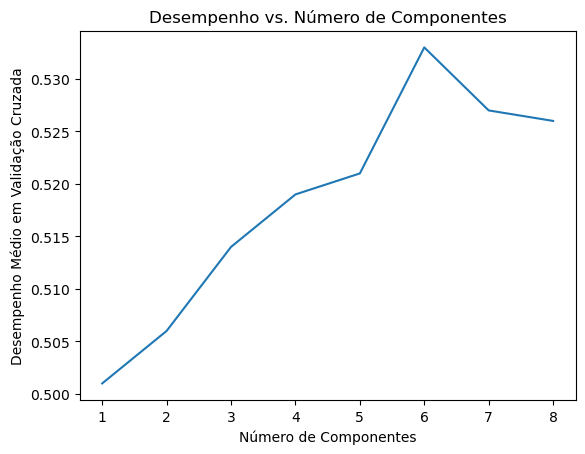

In [23]:
# Plot
plt.plot(range(1, 9), scores)
plt.xlabel('Número de Componentes')
plt.ylabel('Desempenho Médio em Validação Cruzada')
plt.title('Desempenho vs. Número de Componentes')
plt.show()

## LOOCV - Leave One Out Cross-Validation

O Leave One Out Cross-Validation (LOOCV) é uma técnica de validação cruzada em que, a cada iteração, uma única observação é usada como conjunto de teste e o restante dos dados é usado como conjunto de treinamento. Este processo é repetido para cada observação no conjunto de dados, resultando em tantas iterações quanto observações no conjunto. A ideia é treinar o modelo em quase todos os dados e testá-lo em uma pequena porção (neste caso, uma única observação) repetidamente.

In [24]:
len(pca_data)

1000

In [25]:
# Aplicando o LOOCV
loo = LeaveOneOut()
lr = LogisticRegression()
scores_loo = cross_val_score(lr, pca_data, df['target'], cv = loo)
print(f"LOOCV Score: {scores_loo.mean()}")

LOOCV Score: 0.523


## Criando o Modelo Final com os Componentes Principais

Aqui, escolhemos o número ideal de componentes com base no gráfico anterior e treinamos nosso modelo com esse número.

In [26]:
# Considerando que 6 é o número ideal de componentes
pca_final = PCA(n_components = 6)
pca_data_final = pca_final.fit_transform(scaled_data)
lr_final = LogisticRegression()
lr_final.fit(pca_data_final, df['target'])

LogisticRegression()

In [27]:
# Simulando novos dados
new_data = np.random.randn(10, 8)

In [28]:
new_data

array([[ 0.63122436, -1.15122666,  1.1049972 , -0.37753115,  1.25761311,
        -0.53345245, -1.02662548, -0.45813699],
       [-0.09514812, -0.38847991, -0.21600142,  0.33396515, -0.17117937,
        -0.06611239, -1.7092264 ,  0.39169802],
       [-0.0892033 ,  1.61029298, -0.93956517, -1.80829533,  0.61806849,
         0.34652702, -1.00843302, -1.52974896],
       [ 1.53739673,  1.41411039, -2.48745676, -0.45822303,  1.66419205,
        -0.47606256, -0.49061223, -0.28275933],
       [-1.12089697, -1.70477574,  1.05254731, -1.84293691,  0.24727145,
         0.88657949, -1.4512263 , -0.9242684 ],
       [ 1.21317919,  0.53289172, -0.61728571,  1.202249  ,  1.20653572,
         0.26905269, -0.90016023, -0.4134487 ],
       [ 0.28638674, -0.18859483,  0.93895718, -1.52977408, -1.49426353,
         0.18087111, -0.49154441, -0.62704861],
       [-1.76805672,  0.01954584, -0.05275511,  0.65347898,  0.06890613,
        -0.13260408,  1.17700064, -1.3124673 ],
       [ 0.53638922, -1.67114716

In [29]:
# Padroniza os dados de entrada
scaled_new_data = scaler.transform(new_data)

In [30]:
# Aplica o PCA
pca_new_data = pca_final.transform(scaled_new_data)

In [31]:
# Previsões usando os componentes principais
predictions = lr_final.predict(pca_new_data)
print(predictions)

[1 1 0 1 0 1 0 0 1 1]
